# $K$-means

## Lecture 6

### GRA 4160
### Predictive modelling with machine learning

#### Lecturer: Vegard H. Larsen

$K$-means is a simple and widely used clustering algorithm that partitions the data into $K$ clusters based on similarity of data points.
The algorithm starts by randomly selecting $K$ cluster centers, then iteratively assigns each data point to the nearest center, and updates the centers to the mean of the assigned data points.
This process is repeated until the clusters are stable.

$K$-means assumes that the clusters are spherical and have equal variance, which may not always be the case.
The algorithm is also sensitive to the initial placement of the cluster centers, and may get stuck in local optima.
Therefore, multiple initialization may be needed to find the global optimum.

It's important to preprocess the data before applying $K$-means clustering.
This may include handling missing values, encoding categorical variables, and normalizing the features to a common scale.
Normalization can help improve the performance of the algorithm.

One of the most important considerations in $k$-means clustering is determining the number of clusters.
This can be done using a variety of methods, such as the elbow method or the silhouette method, which evaluate the within-cluster sum of squares and the quality of the clustering respectively.

It's important to evaluate the performance of the clustering to determine whether it has successfully identified meaningful patterns in the data.
This can be done using metrics such as the within-cluster sum of squares or the silhouette coefficient.

Once the clusters have been identified, it's important to interpret and visualize the results.
This may involve analyzing the key features that distinguish the clusters, visualizing the clusters using scatter plots or other visualization techniques, and investigating any patterns or insights in the data set.

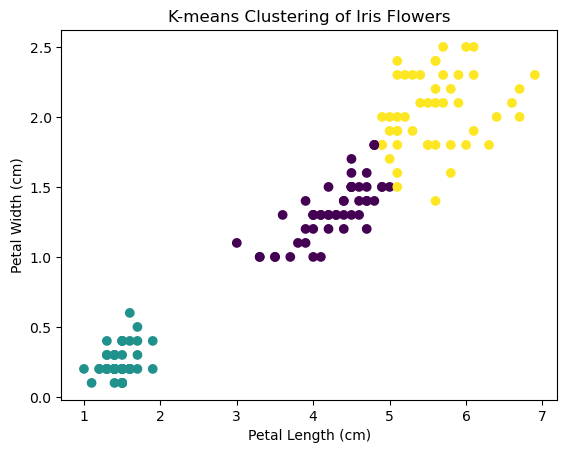

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the iris data set
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

# Subset the data set to include only petal length and width
X = df[['PetalLengthCm', 'PetalWidthCm']]

# Apply k-means clustering with 3 clusters (one for each species of iris)
# the n_init parameter specifies the number of time the k-means algorithm will be run with different centroid seeds. 
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X)

# Visualize the clusters using a scatter plot
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=kmeans.labels_)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Flowers')
plt.show()

## Within-Cluster Sum of Squares (WCSS)

The Within-Cluster Sum of Squares (WCSS) is a metric used to evaluate the performance of clustering algorithms, particularly the $K$-means clustering algorithm.
It measures the sum of the squared distances between each data point and its assigned cluster centroid. In other words, it measures the compactness of the clusters.

The WCSS is computed by summing the squared Euclidean distances between each data point and its assigned cluster centroid, for all data points in all clusters. 
Mathematically, it is given by:

$$WCSS = \sum\left(\sum((X - centroid)^2)\right)$$

where $X$ is the data matrix, centroid is the centroid matrix (containing the coordinates of the centroids for each cluster), and the inner sum is taken over all data points in all clusters.

The goal of the $K$-means clustering algorithm is to minimize the WCSS, which corresponds to finding the cluster centroids that are closest to the data points. 
The optimal number of clusters can be determined by finding the "elbow" point in the WCSS curve, where the curve starts to level off.

In practice, the WCSS is often used in conjunction with other metrics, such as the silhouette coefficient, to evaluate the performance of clustering algorithms and determine the optimal number of clusters.

The elbow method involves plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters. 
As the number of clusters increases, the WCSS typically decreases, because more clusters means the data points can be fitted more closely to their respective centroids. 
However, at some point the gain in WCSS reduction becomes less significant, and adding more clusters doesn't lead to significant improvement in clustering performance. 
This point is called the "elbow" of the WCSS curve, and the number of clusters at the elbow is often chosen as the optimal number of clusters.

## Silhouette Score

The Silhouette Score is another metric used to evaluate the performance of the K-means clustering algorithm.
It measures the degree of similarity of each data point to its own cluster compared to other clusters.
In other words, it measures the quality of the clusters.

The Silhouette Score ranges from -1 to 1, where a score of 1 indicates that the data point is very similar to its own cluster and very dissimilar to other clusters, and a score of -1 indicates the opposite (i.e., the data point is very dissimilar to its own cluster and very similar to other clusters). A score of 0 indicates that the data point is equally similar to its own cluster and to other clusters.

The Silhouette Score is computed by taking the mean Silhouette Coefficient of all data points in the data set. The Silhouette Coefficient for each data point is given by:

$$s = \frac{(b - a)}{\max(a, b)}$$

where $a$ is the mean distance between the data point and all other data points in its own cluster, and $b$ is the mean distance between the data point and all data points in the nearest cluster (i.e., the cluster that is most dissimilar to the data point).

The silhouette method is a more direct approach than the elbow method to determine the optimal number of clusters. It measures the quality of the clustering by computing the silhouette score for each data point. The average silhouette score is computed for each value of $k$ (the number of clusters) and plotted as a function of $k$. The value of $k$ that maximizes the average silhouette coefficient is chosen as the optimal number of clusters.

## Use the elbow method and the silhouette method to determine the optimal number of clusters

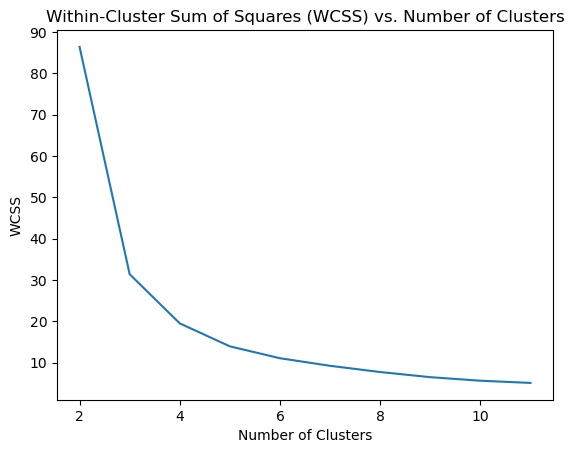

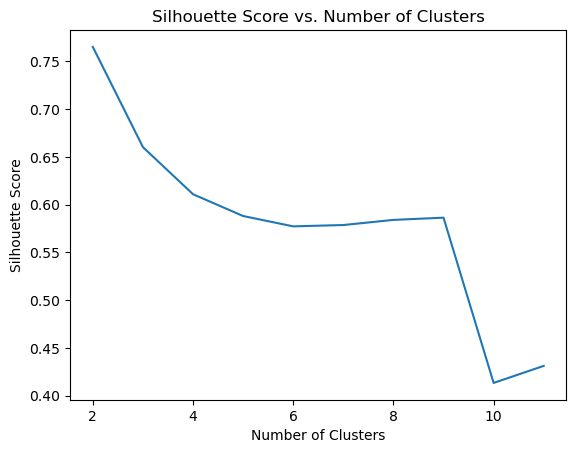

In [8]:
from sklearn.metrics import silhouette_score

# Vary the number of clusters and evaluate the performance of the clustering
wcss = []
silhouette_scores = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Visualize the performance of the clustering using a plot of WCSS and Silhouette scores
plt.plot(range(2, 12), wcss)
plt.title('Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

plt.plot(range(2, 12), silhouette_scores)
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Apply $K$-means with the "optimal" number of clusters

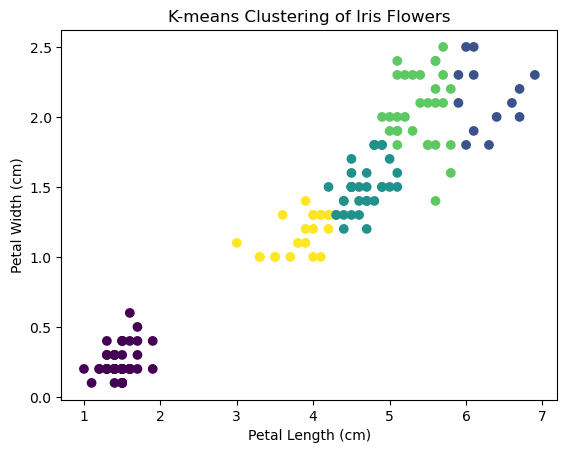

In [9]:
# Apply k-means clustering with 3 clusters (one for each species of iris)
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(X)

# Visualize the clusters using a scatter plot
plt.scatter(X['PetalLengthCm'], X['PetalWidthCm'], c=kmeans.labels_)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Flowers')
plt.show()